In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import numpy as np
import healpy as hp
from astropy.io import fits
from pprint import pprint
from tqdm import tqdm
import pickle
import corner
import os

from scipy import optimize
from scipy.stats import poisson

import jax
import jax.numpy as jnp

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../utils/matplotlibrc')

from utils import ed_fcts_amarel as ef
from utils import create_mask as cm
from utils import ed_plotting as eplt


/home/edr76/.conda/envs/jax/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load SVI fit results (these should be the only parameters that you are loading)
gpu_id = '1'

# sim name
sim_name = 'canon_g1p2_ola_v2'

In [3]:
# load GPU
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
os.environ['CUDA_VISIBLE_DEVICES'] = gpu_id

data_dir = ef.load_data_dir(sim_name)
os.system("mkdir -p "+data_dir)

ebin = 10
temp_dict = np.load(data_dir + 'all_templates_ebin' + str(ebin)  + '.npy', allow_pickle=True).item()

In [4]:
from models.poissonian_gp import EbinPoissonModel # to set GPU at the beginning

# load SVI fit results (these should be the only parameters that you are loading)
sim_id = 7.1234567
temp_id = 5.23457
gp_id = 1.16
blg_id = -1
mod_id = 11
svi_id = 300
svi_seed = 0
sim_seed = 1000

fit_filename, module_name = ef.generate_fit_filename_from_ids(sim_id, temp_id, gp_id, blg_id, mod_id, svi_id, sim_seed, svi_seed)
fit_dir = data_dir + 'fits/' + fit_filename + '/'
ef.list_files(fit_dir)

sys.path.append(fit_dir)
import importlib 
module = importlib.import_module(module_name)

# Load all the variables from the module
globals().update(vars(module))

file_name_gp = ('ebin' + str_ebin + '_smp_svi_' + 
        str_lr + '_' + str_n_steps + '_' + 
        str_guide + '_' + str_num_particles + '_' + 
        str_sim_seed + '_' + str_svi_seed + '.p')

samples_dict_1, svi_results_1 = pickle.load(open(fit_dir + file_name_gp, 'rb'))

/
    settings_7p1234567_5p23457_1p16_-1_11_300_1000_0.py
    __init__.py
    ebin10_smp_svi_0.1_20000_mvn_8_1000_0.p
    summary.txt
__pycache__/
    settings_7p1234567_5p23457_1p16_-1_11_300_1000_0.cpython-311.pyc


In [5]:
from models.poissonian_gp import EbinPoissonModel # to set GPU at the beginning

# load SVI fit results (these should be the only parameters that you are loading)
sim_id = 7.1234567
temp_id = 5.23457
gp_id = 1.16
blg_id = -1
mod_id = 11
svi_id = 6531
svi_seed = 0
sim_seed = 1000

fit_filename, module_name = ef.generate_fit_filename_from_ids(sim_id, temp_id, gp_id, blg_id, mod_id, svi_id, sim_seed, svi_seed)
fit_dir = data_dir + 'fits/' + fit_filename + '/'
ef.list_files(fit_dir)

sys.path.append(fit_dir)
import importlib 
module = importlib.import_module(module_name)

# Load all the variables from the module
globals().update(vars(module))

file_name_gp = ('ebin' + str_ebin + '_smp_svi_' + 
        str_lr + '_' + str_n_steps + '_' + 
        str_guide + '_' + str_num_particles + '_' + 
        str_sim_seed + '_' + str_svi_seed + '.p')

samples_dict_2, svi_results_2 = pickle.load(open(fit_dir + file_name_gp, 'rb'))

/
    settings_7p1234567_5p23457_1p16_-1_11_6531_1000_0.py
    __init__.py
    summary.txt
    ebin10_smp_svi_0.1_20000_mvn_8_1000_0.p


In [6]:
from models.poissonian_gp import EbinPoissonModel # to set GPU at the beginning

# load SVI fit results (these should be the only parameters that you are loading)
sim_id = 7.1234567
temp_id = 5.23457
gp_id = 1.16
blg_id = -1
mod_id = 11
svi_id = 6532
svi_seed = 0
sim_seed = 1000

fit_filename, module_name = ef.generate_fit_filename_from_ids(sim_id, temp_id, gp_id, blg_id, mod_id, svi_id, sim_seed, svi_seed)
fit_dir = data_dir + 'fits/' + fit_filename + '/'
ef.list_files(fit_dir)

sys.path.append(fit_dir)
import importlib 
module = importlib.import_module(module_name)

# Load all the variables from the module
globals().update(vars(module))

file_name_gp = ('ebin' + str_ebin + '_smp_svi_' + 
        str_lr + '_' + str_n_steps + '_' + 
        str_guide + '_' + str_num_particles + '_' + 
        str_sim_seed + '_' + str_svi_seed + '.p')

samples_dict_3, svi_results_3 = pickle.load(open(fit_dir + file_name_gp, 'rb'))

[autoreload of __main__ failed: Traceback (most recent call last):
  File "/home/edr76/.conda/envs/jax/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/edr76/.conda/envs/jax/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/edr76/.conda/envs/jax/lib/python3.11/importlib/__init__.py", line 148, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module settings_7p1234567_5p23457_1p16_-1_11_6531_1000_0 not in sys.modules
]


/
    __init__.py
    summary.txt
    settings_7p1234567_5p23457_1p16_-1_11_6532_1000_0.py
    ebin10_smp_svi_0.1_20000_mvn_8_1000_0.p


In [7]:
from models.poissonian_gp import EbinPoissonModel # to set GPU at the beginning

# load SVI fit results (these should be the only parameters that you are loading)
sim_id = 7.1234567
temp_id = 5.23457
gp_id = 1.16
blg_id = -1
mod_id = 11
svi_id = 6533
svi_seed = 0
sim_seed = 1000

fit_filename, module_name = ef.generate_fit_filename_from_ids(sim_id, temp_id, gp_id, blg_id, mod_id, svi_id, sim_seed, svi_seed)
fit_dir = data_dir + 'fits/' + fit_filename + '/'
ef.list_files(fit_dir)

sys.path.append(fit_dir)
import importlib 
module = importlib.import_module(module_name)

# Load all the variables from the module
globals().update(vars(module))

file_name_gp = ('ebin' + str_ebin + '_smp_svi_' + 
        str_lr + '_' + str_n_steps + '_' + 
        str_guide + '_' + str_num_particles + '_' + 
        str_sim_seed + '_' + str_svi_seed + '.p')

samples_dict_4, svi_results_4 = pickle.load(open(fit_dir + file_name_gp, 'rb'))

/
    settings_7p1234567_5p23457_1p16_-1_11_6533_1000_0.py
    summary.txt
    __init__.py
    ebin10_smp_svi_0.1_20000_mvn_8_1000_0.p


In [8]:
debug_nans = False
Nsub = None
nfw_gamma = 'vary'

from models.poissonian_gp import EbinPoissonModel

ebinmodel = EbinPoissonModel(
        # important parameters
        rig_temp_list = rig_temp_list,
        hyb_temp_list = hyb_temp_list,
        var_temp_list = var_temp_list,
        is_gp = is_gp,
        gp_deriv = gp_deriv,
        data_file = data_file,
        rig_temp_sim = rig_temp_sim,
        hyb_temp_sim = hyb_temp_sim,
        var_temp_sim = var_temp_sim,
        is_custom_blg = is_custom_blg,
        custom_blg_id = custom_blg_id,
        sim_seed = sim_seed,
        Nu = Nu,
        u_option = u_option,
        u_grid_type = u_grid_type,
        u_weights = u_weights,
        Np = Np,
        p_option = p_option,
        Nsub = Nsub,

        # default parameters
        ebin = ebin,
        is_float64 = is_float64,
        debug_nans = debug_nans,
        no_ps_mask = no_ps_mask,
        p_grid_type = p_grid_type,
        p_weights = p_weights,
        gp_kernel = gp_kernel,
        gp_params = gp_params,
        gp_scale_option = gp_scale_option,
        monotonicity_hyperparameter = monotonicity_hyperparameter,
        nfw_gamma = nfw_gamma,
        blg_names = blg_names,
        dif_names = dif_names,
        )
ebinmodel.config_model(ebin=ebin)

[autoreload of __main__ failed: Traceback (most recent call last):
  File "/home/edr76/.conda/envs/jax/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/edr76/.conda/envs/jax/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/edr76/.conda/envs/jax/lib/python3.11/importlib/__init__.py", line 148, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module settings_7p1234567_5p23457_1p16_-1_11_6533_1000_0 not in sys.modules
]


In [9]:
# generate samples and plot histograms of log counts

temp_names_sim = rig_temp_sim + hyb_temp_sim + var_temp_sim # imported from settings file

# generate temp_sample_dict
all_temp_names = ['iso', 'psc', 'bub', 'pib', 'ics', 'blg', 'nfw', 'dsk', 'gp']
names = list(samples_dict_1.keys())
temp_sample_dict_cmask_1 = {k: samples_dict_1[k + '_cmask'] for k in all_temp_names if k in names}
temp_sample_dict_cmask_2 = {k: samples_dict_2[k + '_cmask'] for k in all_temp_names if k in names}
temp_sample_dict_cmask_3 = {k: samples_dict_3[k + '_cmask'] for k in all_temp_names if k in names}
temp_sample_dict_cmask_4 = {k: samples_dict_4[k + '_cmask'] for k in all_temp_names if k in names}

In [10]:
mask = cm.make_mask_total(
        nside=128,
        mask_ring=True,
        outer = 20.,
        inner = 0.,
    )

In [11]:
n_pixels = 160

# take quantiles of samples
Nx1, Nx2, x1_plt, x2_plt, x1_c, x2_c, x = ef.cart_coords(n_pixels = n_pixels)

# cartesian map of masks to keep track of masking for plots
mask_map = np.zeros((~ebinmodel.mask_roi_arr[ebin]).sum())
mask_map_cart = ef.healpix_to_cart(mask_map, ebinmodel.mask_roi_arr[ebin], n_pixels = n_pixels, nside = 128, nan_fill = True) # doesn't matter what mask used

# cartesian gp samples
exp_gp_samples_1 = temp_sample_dict_cmask_1['gp']
exp_gp_samples_cart_1 = ef.multi_healpix_to_cart(exp_gp_samples_1, mask, n_pixels = n_pixels, nside = 128)
q1 = np.percentile(exp_gp_samples_cart_1, [2.5,16,50,84,97.5], axis = 0) # cartesian sample map quantiles

exp_gp_samples_2 = temp_sample_dict_cmask_2['gp']
exp_gp_samples_cart_2 = ef.multi_healpix_to_cart(exp_gp_samples_2, mask, n_pixels = n_pixels, nside = 128)
q2 = np.percentile(exp_gp_samples_cart_2, [2.5,16,50,84,97.5], axis = 0) # cartesian sample map quantiles

exp_gp_samples_3 = temp_sample_dict_cmask_3['gp']
exp_gp_samples_cart_3 = ef.multi_healpix_to_cart(exp_gp_samples_3, mask, n_pixels = n_pixels, nside = 128)
q3 = np.percentile(exp_gp_samples_cart_3, [2.5,16,50,84,97.5], axis = 0) # cartesian sample map quantiles

exp_gp_samples_4 = temp_sample_dict_cmask_4['gp']
exp_gp_samples_cart_4 = ef.multi_healpix_to_cart(exp_gp_samples_4, mask, n_pixels = n_pixels, nside = 128)
q4 = np.percentile(exp_gp_samples_cart_4, [2.5,16,50,84,97.5], axis = 0) # cartesian

# create gp_true from scratch
temp_names_sim = rig_temp_sim + hyb_temp_sim + var_temp_sim # imported from settings file
ebinmodel.load_templates(temp_names_sim, blg_names, dif_names)
gp_true = ( temp_dict['S_blg'] * ebinmodel.blg_temps[0].at_bin(ebin, mask) + temp_dict['S_nfw'] * ebinmodel.nfw_temp.get_NFW2_template(gamma = temp_dict['gamma'])[~mask] )

100%|██████████| 1000/1000 [00:25<00:00, 38.74it/s]


Slice at y = 3.37500 deg
Slice at y = 3.37500 deg
Slice at y = 3.37500 deg
Slice at y = 3.37500 deg


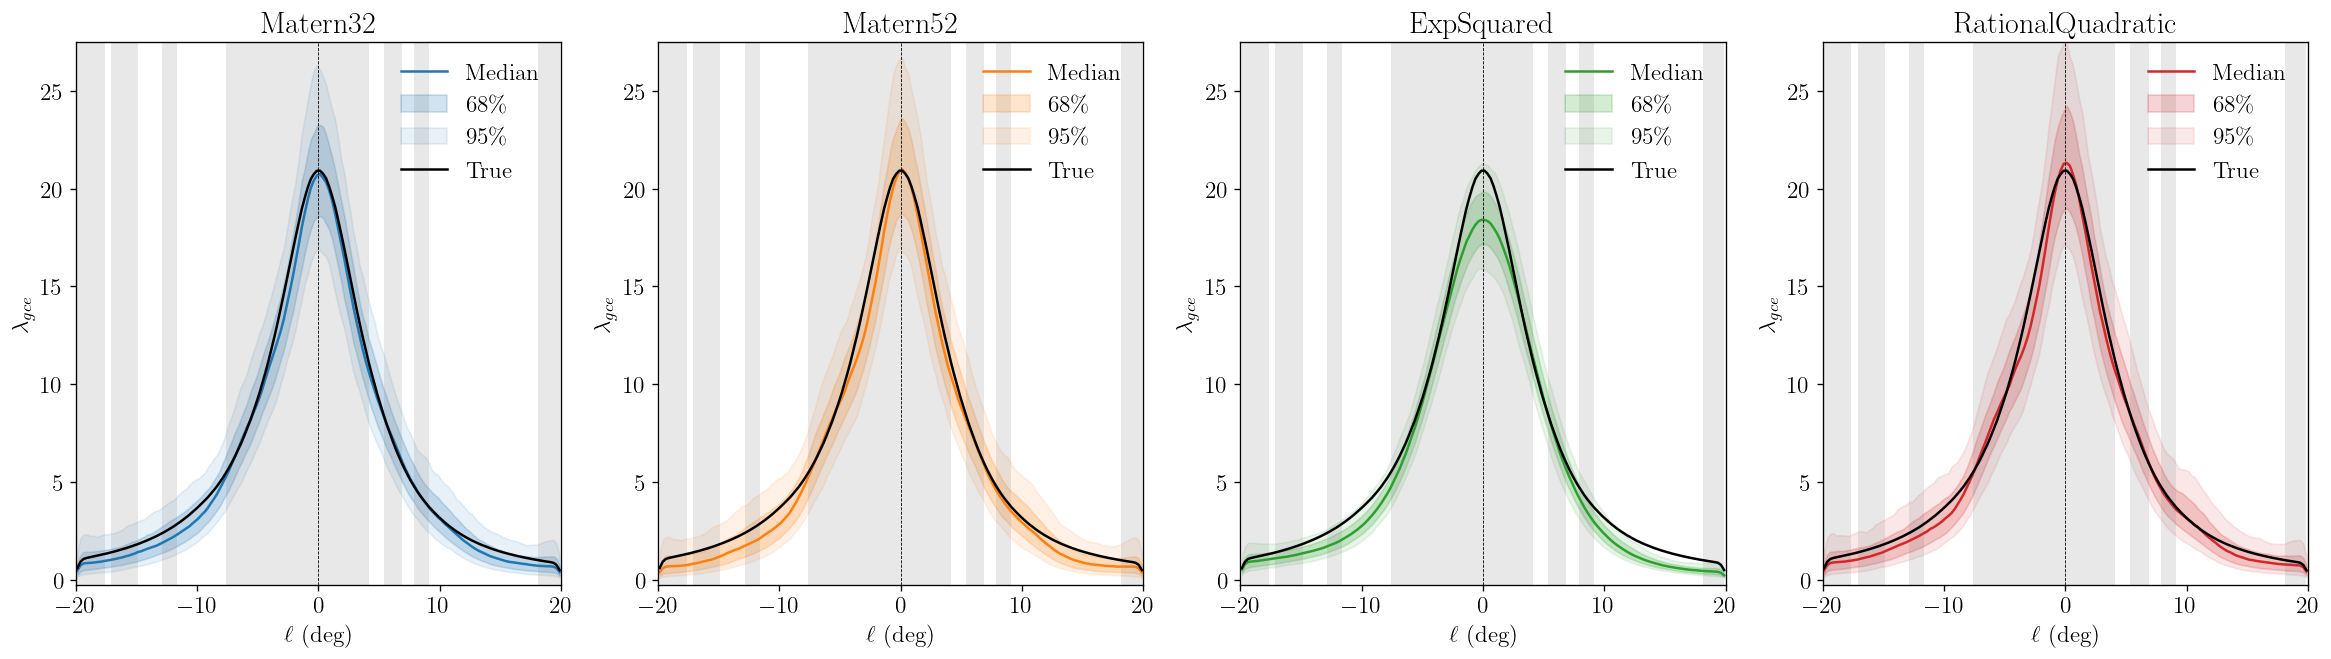

In [12]:
slice_val = 3.2  # y-value of slice
sim_cart = ef.healpix_to_cart(gp_true, mask, n_pixels = n_pixels, nside = 128) # simulated rate cartesian map
raw_cart = None

fig, axes = plt.subplots(figsize=(6*4, 6 - 0.125), dpi= 120, nrows = 1, ncols = 4)

titles = ['Matern32', 'Matern52', 'ExpSquared', 'RationalQuadratic']

for i, q in enumerate([q1, q2, q3, q4]):
    plt.axes(axes[i])
    eplt.cart_plot_1d(q, sim_cart = sim_cart, raw_cart = raw_cart, 
        slice_val = slice_val, 
        mask_map_cart = mask_map_cart,
        n_pixels = n_pixels,
        ylabel = '$\\lambda_{gce}$', q_color = 'C' + str(i), line_color = 'black')
    axes[i].set_title(titles[i])
    axes[i].set_ylim(-0.25, 27.5)

In [13]:
# save data for appendix figures

exp_gp_samples_cart_list = [exp_gp_samples_cart_1, exp_gp_samples_cart_2, exp_gp_samples_cart_3, exp_gp_samples_cart_4]
pickle.dump(
    (mask_map_cart, gp_true, exp_gp_samples_cart_list),
    open('../figures/data/app_kernels.p', 'wb')
)